In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Import datasets, classifiers and performance metrics
import sklearn
from sklearn import neural_network
from sklearn import datasets, svm, metrics
#from sklearn import confusion
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


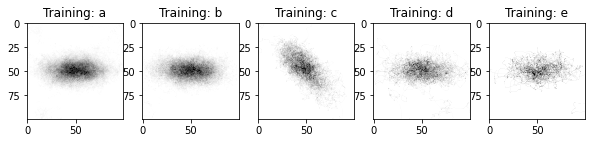

In [2]:
save_dir = "./Data/Classification Images/5_60"
#with open(save_dir+'/'+'learning.pickle', 'rb') as f:
#    database = pickle.load(f)
    
with open(save_dir+'/'+'k_01_05_1_(1).pickle', 'rb') as f:
    database = pickle.load(f)
    
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, database.images_xy[::60], database.target[::60]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: ' + str(label))

In [10]:
# flatten the images
list_of_images = database.images_xy
n_samples = len(list_of_images)
#data = database.images_xy.reshape((n_samples, -1))
data = np.stack((database.images_xy.reshape((n_samples, -1)),  # reshapes every planar image into a line of data 
                 database.images_xz.reshape((n_samples, -1)),  # and joins every plane in one array
                 database.images_yz.reshape((n_samples, -1)))).reshape((n_samples, -1))

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

data, target = unison_shuffled_copies(data, database.target)

# Create a classifier: a support vector classifier
clf = svm.SVC(kernel="poly", degree=5, gamma=10**(-10))
#clf = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(2000))

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.1, shuffle=True)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

unique, counts = np.unique(y_train, return_counts=True)  # counting how many of each type are in the training set
print("Training count =", dict(zip(unique, counts)))

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

unique, counts = np.unique(predicted, return_counts=True)  # counting how many of each type are in the training set
print("Predicted count =", dict(zip(unique, counts)))

Training count = {'a': 53, 'b': 50, 'c': 57, 'd': 54, 'e': 56}
Predicted count = {'a': 12, 'b': 4, 'c': 7, 'd': 3, 'e': 4}


<IPython.core.display.Javascript object>


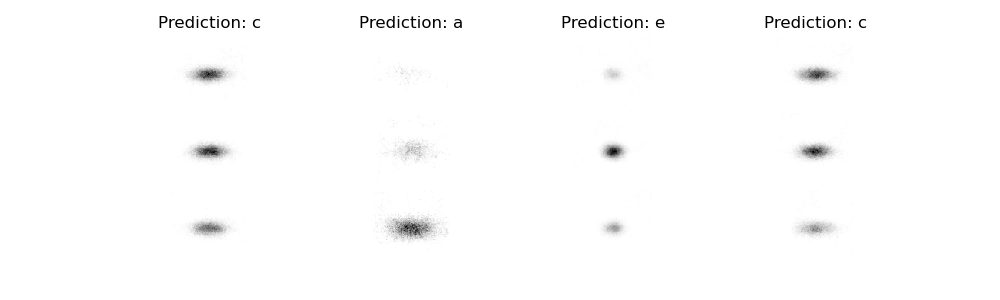

In [11]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(300, 100)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [12]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(degree=5, gamma=1e-10, kernel='poly'):
              precision    recall  f1-score   support

           a       0.50      0.86      0.63         7
           b       0.50      0.20      0.29        10
           c       0.29      0.67      0.40         3
           d       1.00      0.50      0.67         6
           e       0.25      0.25      0.25         4

    accuracy                           0.47        30
   macro avg       0.51      0.49      0.45        30
weighted avg       0.55      0.47      0.45        30




<IPython.core.display.Javascript object>


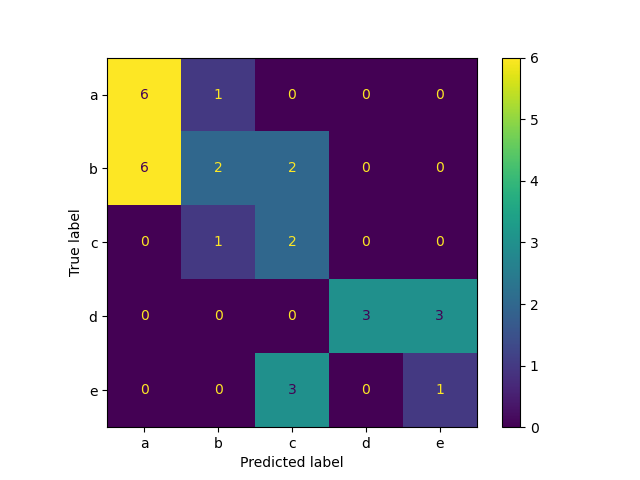

In [13]:
cm = confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

# Hyperparameter optimization

0
1
2
3
4
5
6


<IPython.core.display.Javascript object>


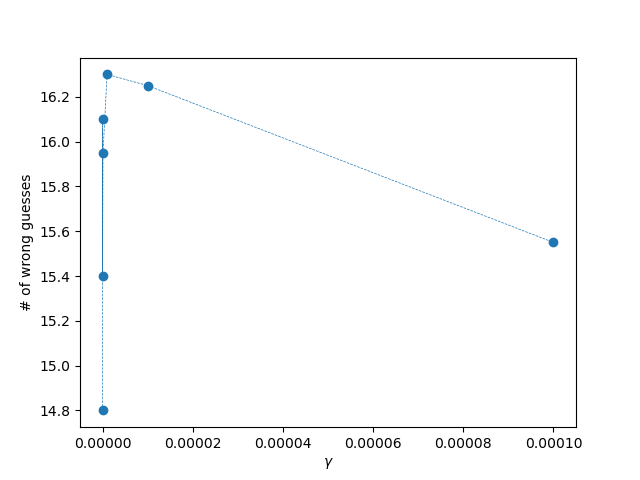

Text(0, 0.5, '# of wrong guesses')

In [9]:
%matplotlib notebook
# flatten the images

# flatten the images
list_of_images = database.images_xy
n_samples = len(list_of_images)
#data = database.images_xy.reshape((n_samples, -1))
data = np.stack((database.images_xy.reshape((n_samples, -1)),  # reshapes every planar image into a line of data 
                 database.images_xz.reshape((n_samples, -1)),  # and joins every plane in one array
                 database.images_yz.reshape((n_samples, -1)))).reshape((n_samples, -1))

targets = database.target
M = 20  # times to test each gamma value

list_gamma = [10**(-10),10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4)]
WG=np.zeros(len(list_gamma))
for gamma in range(len(list_gamma)):
    print(gamma)
    for m in range(M):
        # Create a classifier: a support vector classifier
        model = svm.SVC(kernel="poly", degree=4, gamma=list_gamma[gamma])

        # Split data into 50% train and 50% test subsets
        X_train, X_test, y_train, y_test = train_test_split(
            data, targets, test_size=0.1, shuffle=True)

        # Learn the digits on the train subset
        model.fit(X_train, y_train)

        # Predict the value of the digit on the test subset
        predicted = model.predict(X_test)

        wrong_guesses = np.where(predicted != y_test)

        WG[gamma] += (len(wrong_guesses[0]))/M

plt.subplots()
plt.plot(list_gamma, WG, 'o', lw=0.5,ls='--')
plt.xlabel(r'$\gamma$')
plt.ylabel("# of wrong guesses")

# Polynomial order optimization

2
3
4
5
6
7
8
9
10
11
12
13
14
15


<IPython.core.display.Javascript object>


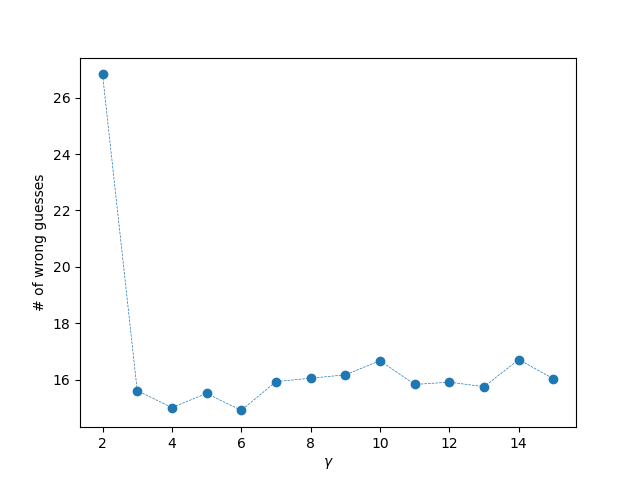

Text(0, 0.5, '# of wrong guesses')

In [26]:
# flatten the images
list_of_images = database.images_xy
n_samples = len(list_of_images)
#data = database.images_xy.reshape((n_samples, -1))
data = np.stack((database.images_xy.reshape((n_samples, -1)),  # reshapes every planar image into a line of data 
                 database.images_xz.reshape((n_samples, -1)),  # and joins every plane in one array
                 database.images_yz.reshape((n_samples, -1)))).reshape((n_samples, -1))

targets = database.target
M = 50  # times to test each gamma value

orders = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
WG=np.zeros(len(orders))
for o in range(len(orders)):
    print(orders[o])
    for m in range(M):
        # Create a classifier: a support vector classifier
        model = svm.SVC(kernel="poly", degree=o, gamma=10**(-10))

        # Split data into 50% train and 50% test subsets
        X_train, X_test, y_train, y_test = train_test_split(
            data, targets, test_size=0.1, shuffle=True)

        # Learn the digits on the train subset
        model.fit(X_train, y_train)

        # Predict the value of the digit on the test subset
        predicted = model.predict(X_test)

        wrong_guesses = np.where(predicted != y_test)

        WG[o] += (len(wrong_guesses[0]))/M

plt.subplots()
plt.plot(orders, WG, 'o', lw=0.5,ls='--')
plt.xlabel(r'$\gamma$')
plt.ylabel("# of wrong guesses")

In [ ]:
a = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[2,2,2],[2,2,2],[2,2,2]], [[5,5,5],[5,5,5],[5,5,5]]])
b = np.array([[[3,3,3],[3,3,3],[3,3,3]],[[4,4,4],[4,4,4],[4,4,4]], [[6,6,6],[6,6,6],[6,6,6]]])
c = np.array([[[5,5,5],[5,5,5],[5,5,5]],[[6,6,6],[6,6,6],[6,6,6]]])

#a = a.reshape((2, -1))
#b = b.reshape((2,-1))
#c = c.reshape((2,-1))
#d = np.stack((a,b,c), axis=1).reshape((2,-1))
#print(d)

In [ ]:


print(unison_shuffled_copies(a,b))

In [ ]:
infile = open(save_dir+'/'+'learning.pickle','rb')
new_dict = pickle.load(infile)
infile.close()